# Etude de l'immobilier californien avec le modèle lineaire de Scikit Learn


In [8]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
from pandasql import sqldf
from sklearn import datasets

## Exploration des données

In [29]:
ds = datasets.fetch_california_housing()

data=ds.data
target=ds.target
print(ds.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [58]:
ds['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [25]:
df= pd.DataFrame(data, columns=ds['feature_names'],)
df['Prix']= target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prix
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
df.Prix.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Prix, dtype: float64

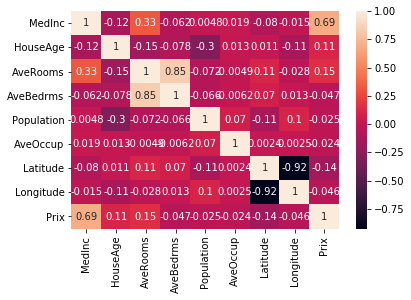

In [33]:
sns.heatmap(df.corr(), annot=True)

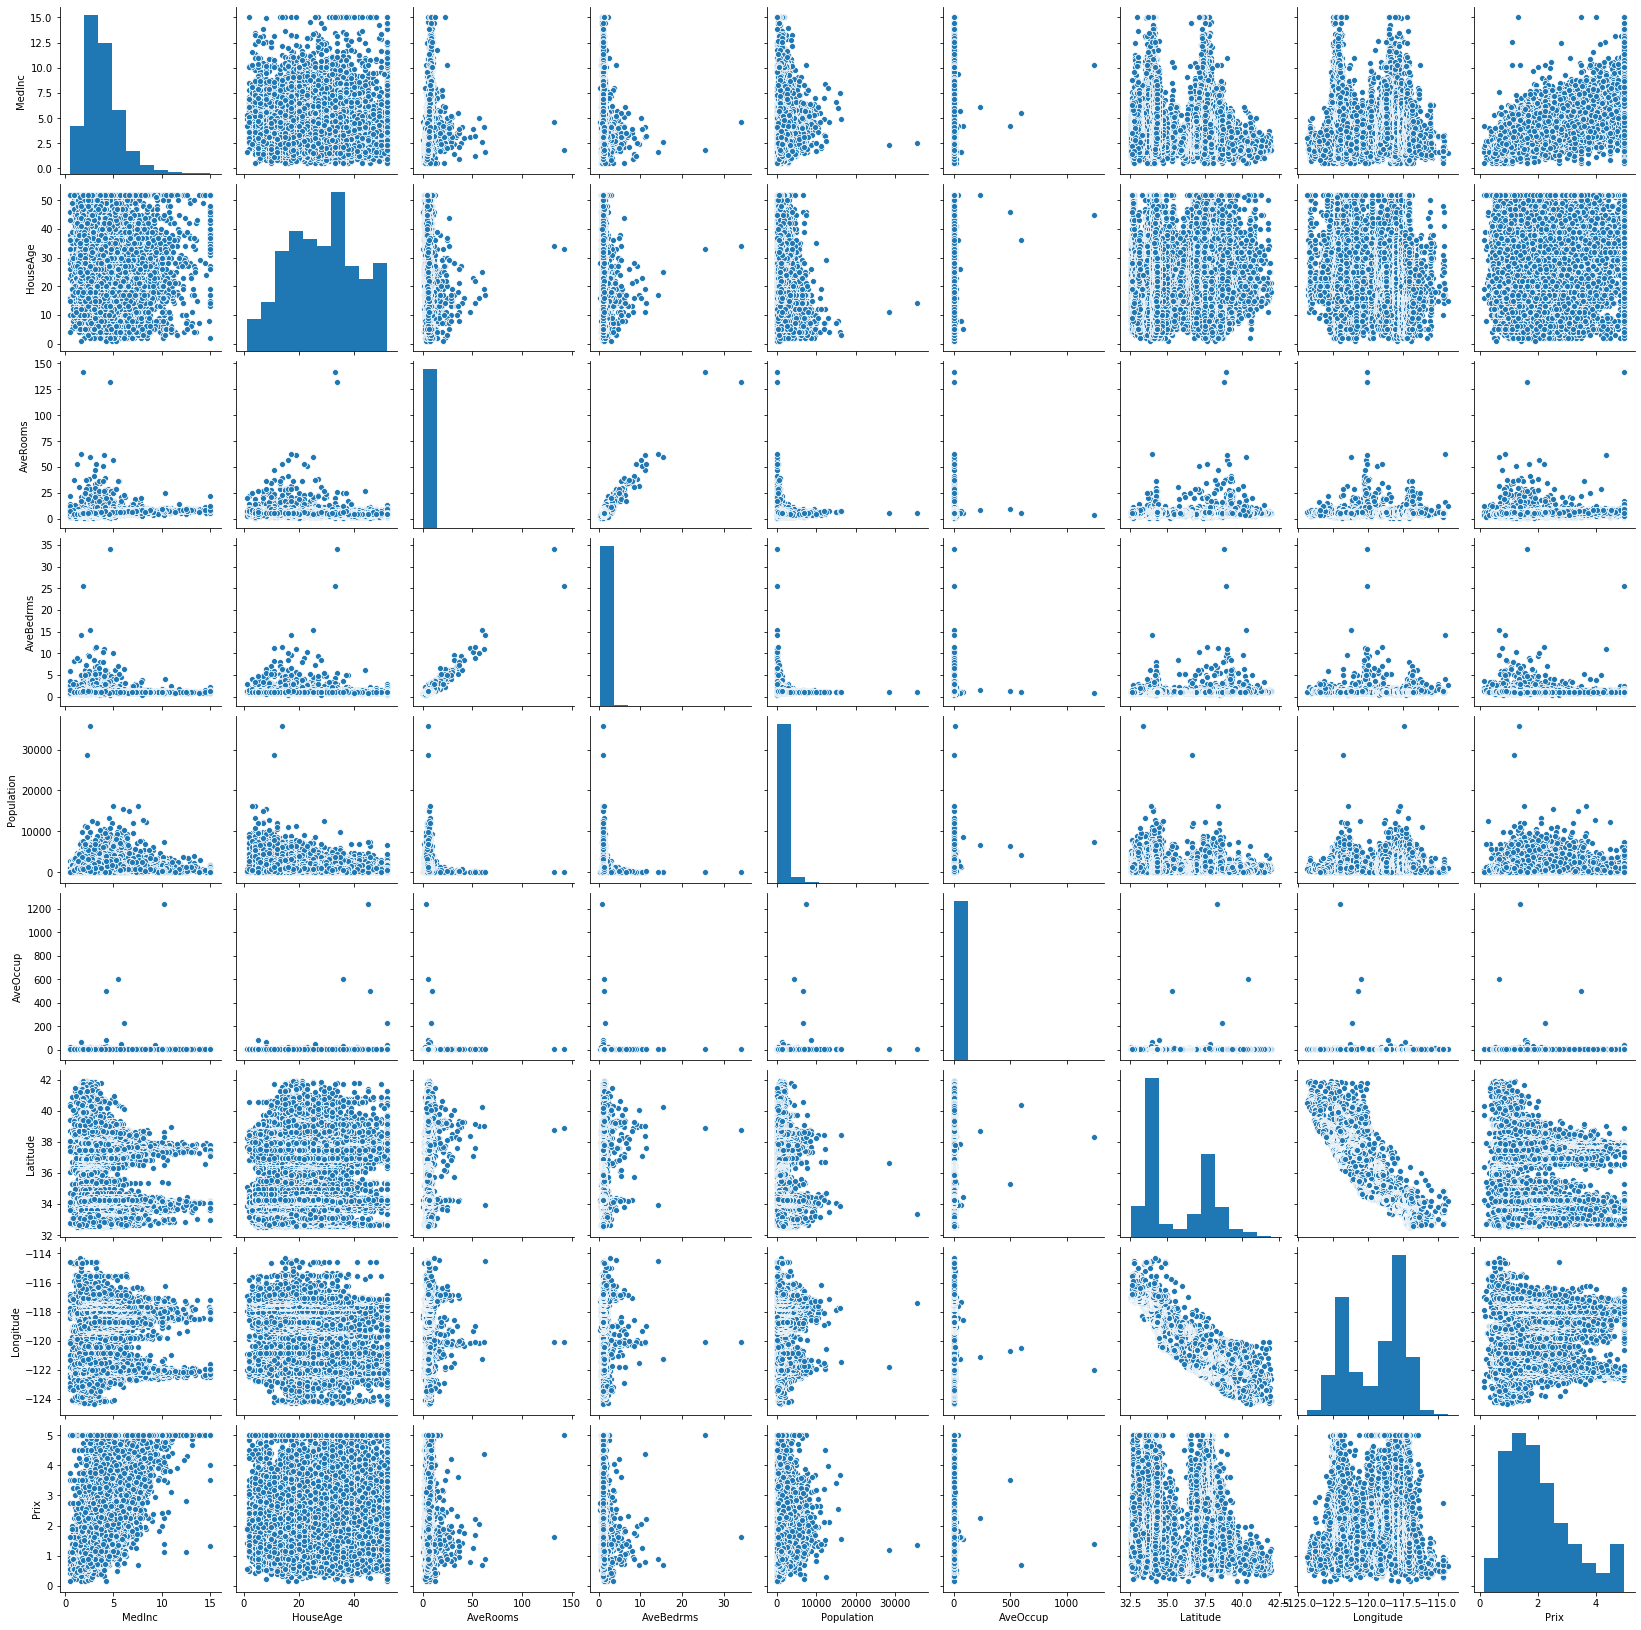

In [34]:
sns.pairplot(df)

# Etude par variable et implémentation du modèle

## Etude de l'income moyen

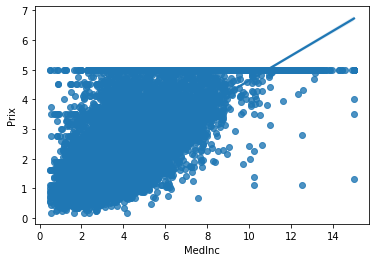

In [35]:
sns.regplot("MedInc", 'Prix', data=df, fit_reg=True, order=0)

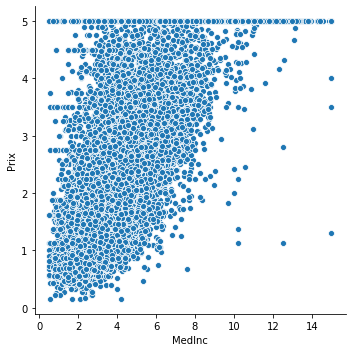

In [38]:
sns.relplot('MedInc', 'Prix', data=df)

In [40]:
datae = df[['MedInc']]
targets = df["Prix"]
datae.head()

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [43]:
#Split des données

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(datae, targets
                                 , random_state=0
                                 , train_size=0.8)

In [45]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

#Entrainement

regr.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:

#Test

result= regr.predict(data_test)

coef= regr.coef_
inter= regr.intercept_

print('Le modèle est donc de la forme y = ',coef,'x + ', inter)

Le modèle est donc de la forme y =  [0.42032178] x +  0.4432063522765701


In [57]:
#Evaluation

regr.coef_

from sklearn.metrics import mean_squared_error, r2_score

ms=mean_squared_error(target_test, result)

R2= r2_score(target_test, result)

print('Le mean squared error est de :', ms)
print('Le score R2 est de : ', R2)


Le mean squared error est de : 0.7214982234014606
Le score R2 est de :  0.4466846804895943


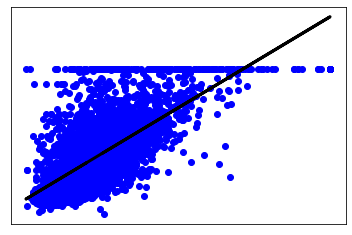

In [61]:
#Visualisation du résultat

plt.scatter(data_test, target_test, color= 'blue')
plt.plot(data_test, result, color='black', linewidth= 3)
plt.xticks(())
plt.yticks(())
plt.show()


# Average Rooms

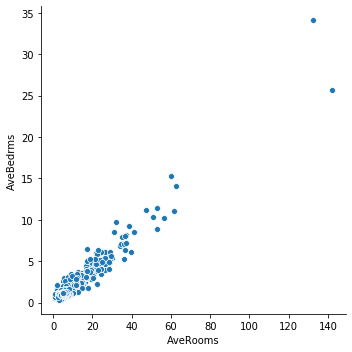

In [66]:
#Corélation average Rooms et average bedrooms

sns.relplot('AveRooms', 'AveBedrms', data=df)

#La relation est presque parfaite

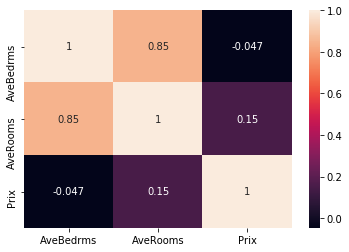

In [73]:
#Vérification de la corélation

df2= df[['AveBedrms', 'AveRooms', 'Prix']]

sns.heatmap(df2.corr(), annot= True)

#On remarque donc que Averooms est mieux corélé avec la target prix donc on utilisera cette variable et ignorerons la variable 
#Avebedrooms

## Modèle à deux variables

In [77]:
df3=df[['AveRooms','MedInc']]

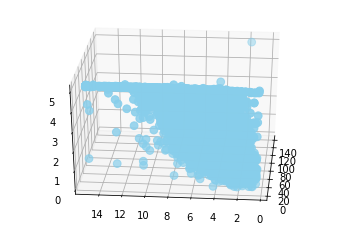

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3['AveRooms'], df3['MedInc'], df['Prix'], c='skyblue', s=60, zorder=8)

ax.view_init(30, 185)
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

data_train2, data_test2, target_train2, target_test2 = train_test_split(df3, targets
                                 , random_state=0
                                 , train_size=0.8)

In [85]:
regr.fit(data_train2, target_train2)
result2=regr.predict(data_test2)


In [86]:
#Evaluation

regr.coef_



ms2=mean_squared_error(target_test, result2)

R2s= r2_score(target_test, result2)

print('Le mean squared error est de :', ms2)
print('Le score R2 est de : ', R2s)

Le mean squared error est de : 0.7101927490883555
Le score R2 est de :  0.4553548226034325


On gagne un peu de précision à hauteur de 1 %

## Population et occupation moyenne 

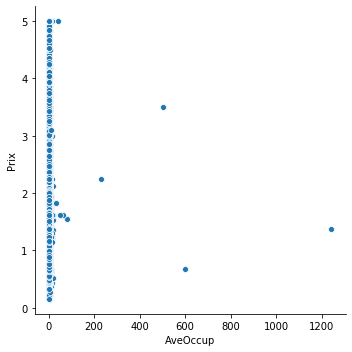

In [93]:
sns.relplot('AveOccup','Prix', data=df)

#Peu ou pas de corélation ici 

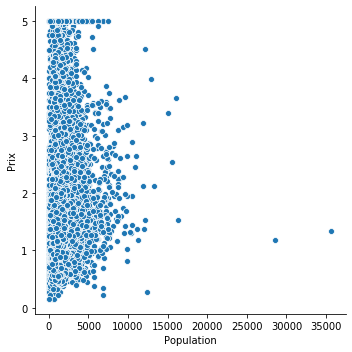

In [94]:
sns.relplot('Population','Prix', data=df)
#Un peu mieux mais on comprend bien le peu de corélation vis à vis de la matrice de corélation à -0,025

## House age 

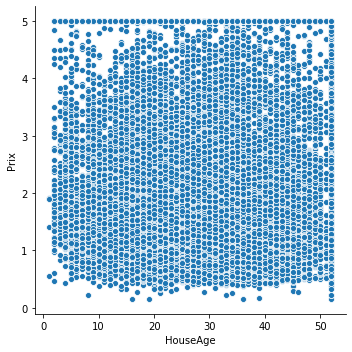

In [95]:
#L'ancienneté de la maison est peut-être plus intéressant que les deux précédentes variables

sns.relplot('HouseAge', 'Prix', data=df)

#Même avec un coeficient à 0,13 il est assez évident qu'on ne tirera pas grand chose de ces données. 

## Essayons avec 3 variables parmis les deux isolées plus hauts (House Age et Population)

In [99]:
df4=df[["HouseAge","AveRooms","MedInc"]]

#------------------------------------------------------------------------------------------

df5=df[["Population","AveRooms","MedInc"]]

In [101]:
data_train3, data_test3, target_train3, target_test3 = train_test_split(df4, targets
                                 , random_state=0
                                 , train_size=0.8)

#-------------------------------------------------------------------------------------------

data_train4, data_test4, target_train4, target_test4 = train_test_split(df5, targets
                                 , random_state=0
                                 , train_size=0.8)

In [106]:
#House Age

regr.fit(data_train3,target_train3)
result3=regr.predict(data_test3)
ms3=mean_squared_error(target_test3, result3)
R23=r2_score(target_test3, result3)

print('Le mean squared error est de :', ms3)
print('Le score R2 est de : ', R23)
#On gagne 3% de score R2


Le mean squared error est de : 0.667296002280967
Le score R2 est de :  0.4882522385579554


In [107]:
#Population

regr.fit(data_train4,target_train4)
result4=regr.predict(data_test4)
ms4=mean_squared_error(target_test4, result4)
R24=r2_score(target_test4, result4)

print('Le mean squared error est de :', ms4)
print('Le score R2 est de : ', R24)
#La variable population ne semble rien apporté aux deux précédentes variable (0,01) 

Le mean squared error est de : 0.7092298402173677
Le score R2 est de :  0.45609327519046483


## Voyons avec 4 variables 

In [111]:
df6=df[["HouseAge","Population","AveRooms","MedInc"]]

data_train5, data_test5, target_train5, target_test5 = train_test_split(df5, targets
                                 , random_state=0
                                 , train_size=0.8)

In [113]:
regr.fit(data_train5,target_train5)
result5=regr.predict(data_test5)
ms5=mean_squared_error(target_test5, result5)
R25=r2_score(target_test5, result5)

print('Le mean squared error est de :', ms5)
print('Le score R2 est de : ', R25)
#On gagne 0,001 de précision 


Le mean squared error est de : 0.6662843828110663
Le score R2 est de :  0.48902804719068094


## Reste Latitude et Longitude

In [115]:
#Essayons de les rentrer dans le modèle tel quel

dfgeo= df[["HouseAge","Population","AveRooms","MedInc","Latitude","Longitude"]]
data_train6, data_test6, target_train6, target_test6 = train_test_split(df6, targets
                                 , random_state=0
                                 , train_size=0.8)

In [116]:
regr.fit(data_train6,target_train6)
result6=regr.predict(data_test6)
ms6=mean_squared_error(target_test6, result6)
R26=r2_score(target_test6, result6)

print('Le mean squared error est de :', ms6)
print('Le score R2 est de : ', R26)
#On gagne 0,001 de précision 

Le mean squared error est de : 0.6662843828110663
Le score R2 est de :  0.48902804719068094


# Exploration des autres modèle Linéaire de Sklearn

## Elastic Net

In [156]:
from sklearn.linear_model import ElasticNet

In [119]:
reg = ElasticNet(random_state=0)

In [157]:
reg.fit(data_train5, target_train5)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
pred=reg.predict(data_test5)


In [159]:
mse=mean_squared_error(target_test5, pred)
R2e=r2_score(target_test5, pred)
print(R2e)
print(mse)

0.4090505929956265
0.7705713762833631


## Decision Tree

In [153]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(data_train5, target_train5)
predtree=clf.predict(data_test5)

In [154]:
mst= mean_squared_error(target_test5, predtree)
r2t=r2_score(target_test5, predtree)
print("R2 Tree",r2t)
print("Mse Tree",mst)

R2 Tree 0.19422627683277116
Mse Tree 1.050692596480338


## SVM

In [160]:
from sklearn import svm

clfa  = svm.SVR(kernel='poly',degree=3)
clfa = clfa.fit(data_train5, target_train5)
predsvm=clfa.predict(data_test5)
mss= mean_squared_error(target_test5, predsvm)
r2s=r2_score(target_test5, predsvm)
print("R2 svm",r2s)
print("Mse svm",mss)

R2 svm -0.037933785228850825
Mse svm 1.3534188475272928


## Adaboost

In [161]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0, n_estimators=100)
ada.fit(data_train5, target_train5)
AdaBoostRegressor(n_estimators=100, random_state=0)
adares=ada.predict(data_test5)


In [162]:
msada= mean_squared_error(target_test5, adares)
r2ada=r2_score(target_test5, adares)
print("R2 ada",r2ada)
print("Mse ada",msada)

R2 ada 0.37202584255435134
Mse ada 0.8188499811282451


In [168]:

>>> from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(random_state=0)
grad.fit(data_train5, target_train5)

resgrad= grad.predict(data_test5)
msgrad= mean_squared_error(target_test5, resgrad)
r2grad =r2_score(target_test5, resgrad)
print("R2 grad",r2grad)
print("Mse grad",msgrad)

R2 ada 0.5795490023026679
Mse ada 0.5482491396305751


## Comparatif des modèle (Avec 4 variables)

In [171]:
print("R2 Linear reg", R25 )
print("Mse Linear reg", ms5)
print(">>>")
print("R2 Tree",r2t)
print("Mse Tree",mst)
print(">>>")
print("R2 Elastic Net",R2e)
print("Mse Elactic Net",mse)
print(">>>")
print("R2 svm",r2s)
print("Mse svm",mss)
print(">>>")
print("R2 ada",r2ada)
print("Mse ada",msada)
print(">>>")
print("R2 grad",r2grad)
print("Mse grad",msgrad)

R2 Linear reg 0.48902804719068094
Mse Linear reg 0.6662843828110663
>>>
R2 Tree 0.19422627683277116
Mse Tree 1.050692596480338
>>>
R2 Elastic Net 0.4090505929956265
Mse Elactic Net 0.7705713762833631
>>>
R2 svm -0.037933785228850825
Mse svm 1.3534188475272928
>>>
R2 ada 0.37202584255435134
Mse ada 0.8188499811282451
>>>
R2 grad 0.5795490023026679
Mse grad 0.5482491396305751



## Utilisation de toute les données disponible dans un modèle Gradient Boosting

 

Le modèle Gradient Boosting c'est montré comparativement parlant comme étant le plus efficace dans ce cas essayons avec l'ensemble des variables (A l'exeption de "AveBedroom")

In [176]:
dffull= df[["HouseAge","Population","AveRooms","MedInc","Latitude","Longitude","AveOccup"]]
data_trainf, data_testf, target_trainf, target_testf = train_test_split(dffull, targets
                                 , random_state=0
                                 , train_size=0.8)
grad.fit(data_trainf, target_trainf)

resgradf= grad.predict(data_testf)
msgradf= mean_squared_error(target_testf, resgradf)
r2gradf =r2_score(target_testf, resgradf)
print("R2 grad",r2gradf)
print("Mse grad",msgradf)

R2 grad 0.7797294596591953
Mse grad 0.28722285091291716
